Distances comparison
====================
When it comes to choose a distance, we often choose Euclidean distance by default.
This short notebook intents to show what are the main differences between some famous (and less famous) distances available in Python.

The methodology is simple: calculate the distance from a given point for all points on a 2-dimensional grid. First we create the grid, then we choose a point, a distance and draw the map. Finally, this operation is repeated to draw the following graph:
![Alt](distances_scipy.png)

In [12]:
import numpy as np
import scipy.spatial.distance as syd
import matplotlib.pyplot as plt

Choice of distance and reference point
------------------------
Distances are chosen among the ones supported in `scipy.spatial.distance` module (see https://docs.scipy.org/doc/scipy/reference/spatial.distance.html for formulae and implementation).

The reference point is the point from which we will map the distance. For Euclidean distance the map does not depend on such point, but for other distances it does.

In [22]:
dist='cityblock'

In [23]:
# Examples of reference points
p0=[0,0]
p1=[1.44,0.77]
p_ref=p1

Creation of the grid
------------------------

The grid is the support for the map: we will calculate thedistance between each point of the grid and the reference point.
To avoid special values or symetries that may lead to non-representative distance, the grid is chosen with random bounds (well beyond -1 and 1, though) and random number of points (large enough,though).

In [24]:
x=np.linspace(-9,9,243)
y=np.linspace(-8.1,7.9,273)

X,Y=np.meshgrid(x,y)
print("X.shape=",X.shape,"Y.shape=",Y.shape)

X.shape= (273, 243) Y.shape= (273, 243)


### Calculation and visualization
The map is now calculated and the distribution of distances is quickly analysed (it is very different from one distance to another) and the result is displayed. Both references ppints given as examples are indicated by "+".

In [25]:
D=np.zeros(X.size)
P=np.array([X.ravel(),Y.ravel()]).T
for i in range(X.size):
    D[i]=eval('syd.'+dist+'(P['+str(i)+',:],p_ref)')
D

array([19.31      , 19.23561983, 19.16123967, ..., 14.54123967,
       14.61561983, 14.69      ])

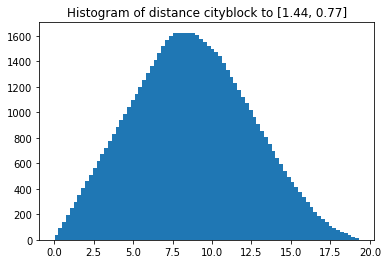

BOUNDS:
 min: 0.039129800680603566 
 max: 19.31
CENTRAL TREND:
 mean: 8.69513569615174 
 median 8.60946524064171
VARIATION:
 std: 3.6848122549354825 
 q75-q25 5.259679144385027


In [26]:
plt.figure()
plt.title('Histogram of distance '+dist+' to '+str(p_ref))
plt.hist(D,80)
plt.show()
print("BOUNDS:\n min:",D.min(),'\n max:',D.max())
print("CENTRAL TREND:\n mean:",D.mean(),'\n median',np.median(D))
print("VARIATION:\n std:",D.std(),'\n q75-q25',np.quantile(D,0.75)-np.quantile(D,0.25))

In [27]:
D=np.reshape(D,X.shape)

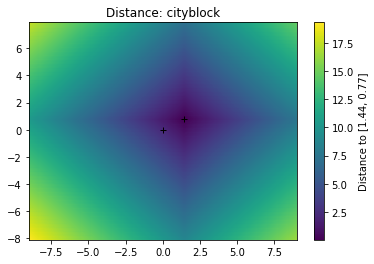

In [28]:
plt.figure()
plt.title('Distance: '+dist)
plt.pcolormesh(X,Y,D)
plt.plot([p0[0],p1[0]],[p0[1],p1[1]],'k+')
plt.colorbar(label='Distance to '+str(p_ref))
plt.show()

Loop for several distances
-------------------------
To create the image shown in introduction, we just repeat these operations inside a loop on several distances.

In [29]:
dist_list=['canberra','chebyshev','cityblock','correlation','cosine','euclidean','sqeuclidean']

Distance:  canberra
Distance:  chebyshev
Distance:  cityblock
Distance:  correlation


/home/bouliech/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Distance:  cosine


/home/bouliech/anaconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Distance:  euclidean
Distance:  sqeuclidean


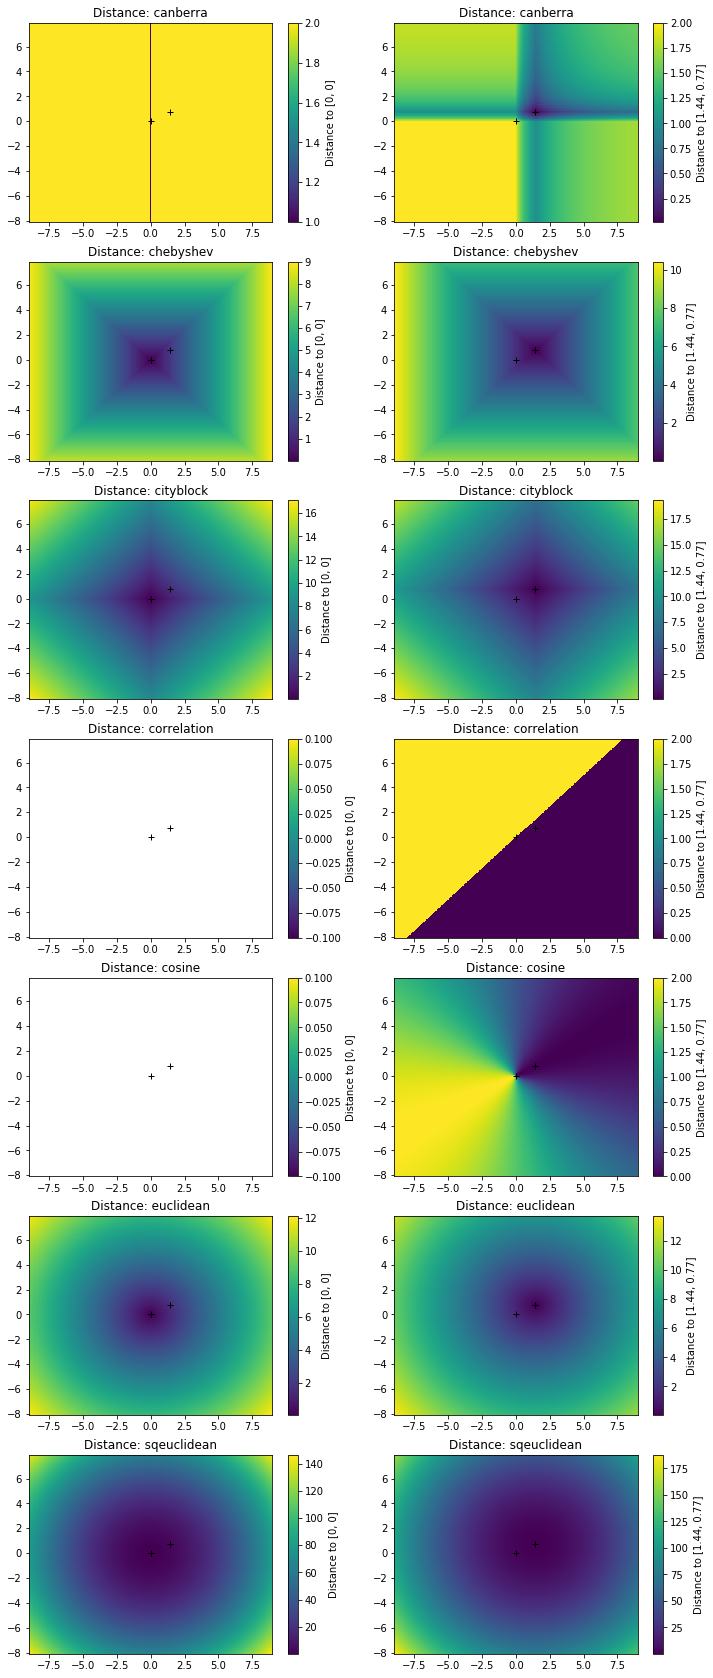

In [30]:
fig, axs = plt.subplots(len(dist_list), 2,figsize=(12,30))

for kd in range(len(dist_list)):
    dist=dist_list[kd]
    print('Distance: ',dist)
    
    D=np.zeros(X.size)
    for i in range(X.size):
        D[i]=eval('syd.'+dist+'(P['+str(i)+',:],p0)')
    D=np.reshape(D,X.shape)
    
    axs[kd,0].set_title('Distance: '+dist)
    axs[kd,0].plot([p0[0],p1[0]],[p0[1],p1[1]],'k+')
    g=axs[kd,0].pcolormesh(X,Y,D)
    fig.colorbar(g,ax=axs[kd,0],label='Distance to '+str(p0))
    
    D=np.zeros(X.size)
    for i in range(X.size):
        D[i]=eval('syd.'+dist+'(P['+str(i)+',:],p1)')
    D=np.reshape(D,X.shape)
    
    axs[kd,1].set_title('Distance: '+dist)
    axs[kd,1].plot([p0[0],p1[0]],[p0[1],p1[1]],'k+')
    g=axs[kd,1].pcolormesh(X,Y,D)
    fig.colorbar(g,ax=axs[kd,1],label='Distance to '+str(p1))
    
plt.show()

Conclusions
------------------
This figure shows several things...

### Limitation of 2D
In order to visualize the map, this experiment is limited to 2D. However, some distances only make sense for higher dimension. It is the case of `correlation`: the correlation between two 2-dimensional vectors is obviously not very informative.

### Importance of zero
We can see that the origin point plays an important role for some distances, namely `canberra`,`cosine`,`correlation`.
As a consequence, they are ill-defined when the reference point is the origin point (denominator to zero for `cosine`,`correlation`, always equals 2 for `canberra` and undefined on the axis).
These distances are also bounded.
Therefore, one must ensure the vectors are in the domain of definition before using these distances.

Conversely, the other distances have the same behavior whatever the reference point. They are also unbounded.
There is no restiction on the definition domain when using these distances.